In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')


In [3]:
# Separate features and labels
x_train = train_data.iloc[:, 1:].values  # All columns except the first
y_train = train_data.iloc[:, 0].values   # First column as labels
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [4]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Reshape the data
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [6]:
# Step 2: Build the model with Regularization, Batch Normalization, and Dropout
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),  # Input layer
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.BatchNormalization(),  # Batch Normalization
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.BatchNormalization(),  # Batch Normalization
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(10, activation='softmax')  # Output layer
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,306 (466.04 KB)

 Trainable params: 118,794 (464.04 KB)

 Non-trainable params: 512 (2.00 KB)

In [7]:
# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Step 4: Define Learning Rate Scheduling and Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)  # Reduce LR on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Early stopping

In [9]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7421 - loss: 2.3774 - val_accuracy: 0.9235 - val_loss: 0.5737 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8689 - loss: 0.7301 - val_accuracy: 0.9276 - val_loss: 0.4904 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8745 - loss: 0.6692 - val_accuracy: 0.9233 - val_loss: 0.5044 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8726 - loss: 0.6657 - val_accuracy: 0.9259 - val_loss: 0.4657 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8729 - loss: 0.6448 - val_accuracy: 0.9341 - val_loss: 0.4340 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8738 - loss: 0.6323 - val_accuracy: 0.9291 - val_loss: 0.4416 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8787 - 

In [10]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1590
Test Accuracy: 0.9725


In [11]:
# Step 7: Make predictions
predictions = model.predict(x_test[:5])
print("Predictions:", np.argmax(predictions, axis=1))
print("Actual Labels:", y_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predictions: [7 2 1 0 4]
Actual Labels: [7 2 1 0 4]


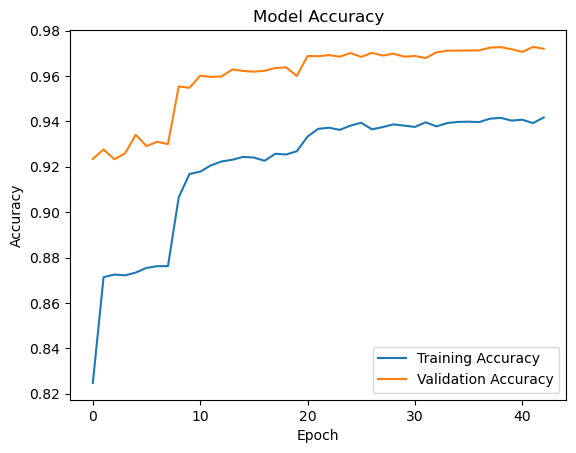

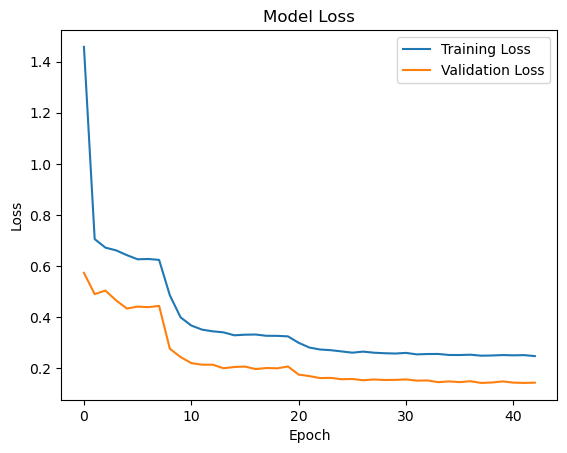

In [12]:
# Step 8: Visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()